# 🧪 Hypothesis Testing on Weight & Height Dataset
*Exploring population, random sampling, and hypothesis testing using Python*


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Introduction
In this notebook, we treat a dataset of 25,000 people's Height and Weight as the population.  
We will:
- Explore the population statistics
- Draw random samples
- Demonstrate Central Limit Theorem
- Perform Z-test & T-test
- Visualize results


In [46]:
data = pd.read_csv('SOCR-HeightWeight.csv')

In [47]:
data.head()

,Index,Height(Inches),height(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [48]:
data.describe()

,Index,Height(Inches),height(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [49]:
data.shape

(25000, 3)

In [50]:
pop_mean_height = data['Height(Inches)'].mean()
pop_std_height = data['Height(Inches)'].std()


In [51]:
print(f"Population Mean Height: {pop_mean_height:.2f}, Std: {pop_std_height:.2f}")

Population Mean Height: 67.99, Std: 1.90


In [52]:
sample = data.sample(100, random_state=42)

In [53]:
sample.head()

,Index,Height(Inches),height(Pounds)
6868,6869,68.42447,134.2855
24016,24017,67.89663,111.9666
9668,9669,67.65922,135.9871
13640,13641,69.01299,126.3802
14018,14019,69.01055,100.1810


In [54]:
sample_mean_height = sample['Height(Inches)'].mean()
sample_std_height = sample['Height(Inches)'].std()


In [55]:
print(f"sample mean height: {sample_mean_height:.2f}, sample std height: {sample_std_height:.2f}")


sample mean height: 68.16, sample std height: 2.10


## 📏 Confidence Interval (CI)

A **Confidence Interval (CI)** is a range of values that is likely to contain the **true population parameter** (e.g., mean) with a certain level of confidence.

### 1️⃣ Concept
- Example: 95% CI for mean height  
- Interpretation:  
  > "We are 95% confident that the true population mean height lies between the lower and upper bounds of this interval."

### 2️⃣ Formula (when population std is unknown, small sample → use t-distribution)
The **t-distribution formula** for CI is:

$$
CI = \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
$$

Where:  
- $\bar{x}$ = Sample mean  
- $s$ = Sample standard deviation  
- $n$ = Sample size  
- $t_{\alpha/2, n-1}$ = Critical t-value from t-distribution  

---

### 3️⃣ Formula (when population std is known, large sample → use z-distribution)
The **z-distribution formula** for CI is:

$$
CI = \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

Where:  
- $\sigma$ = Population standard deviation  
- $Z_{\alpha/2}$ = Critical Z-value from standard normal distribution  

---

### 4️⃣ Key Points
- **Confidence Level:** Commonly 90%, 95%, or 99%  
- **Effect of Sample Size:** Larger sample → narrower CI  
- **Interpretation:** CI gives a **range of plausible values** for the population mean, not a probability for a single sample  

> ⚡ **Tip:** The wider the interval, the more uncertainty about the population mean; increasing sample size reduces uncertainty.


## 📊 Z-Test: Confidence Interval & Interpretation

We performed a **Z-test** to compare the sample mean with the known population mean.  
The **95% Confidence Interval (CI)** for the sample mean is calculated as:

$$
CI = \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

### 1️⃣ Observed Values
- Sample Mean ($\bar{x}$):  `sample_mean`  
- Population Std ($\sigma$): `pop_std`  
- Sample Size (n): `sample_size`  
- Z critical value ($Z_{\alpha/2}$): 1.96 for 95% CI  

### 2️⃣ Calculated Confidence Interval
- Lower Bound: `ci_lower`  
- Upper Bound: `ci_upper`  

### 3️⃣ Interpretation
> "We are 95% confident that the **true population mean height** lies between **ci_lower** and **ci_upper**.  
> Since the population mean (pop_mean) lies within this interval, the sample is consistent with the population."


In [56]:
def Z_test(sample_mean, pop_std, sample_size, confidenece_level):
    margin = confidenece_level * (pop_std / np.sqrt(sample_size))
    upper_limit = sample_mean + margin
    lower_limit = sample_mean - margin
    return upper_limit, lower_limit


ci_upper, ci_lower = Z_test(sample['Height(Inches)'].mean(), pop_std_height, len(sample), 1.96)

    

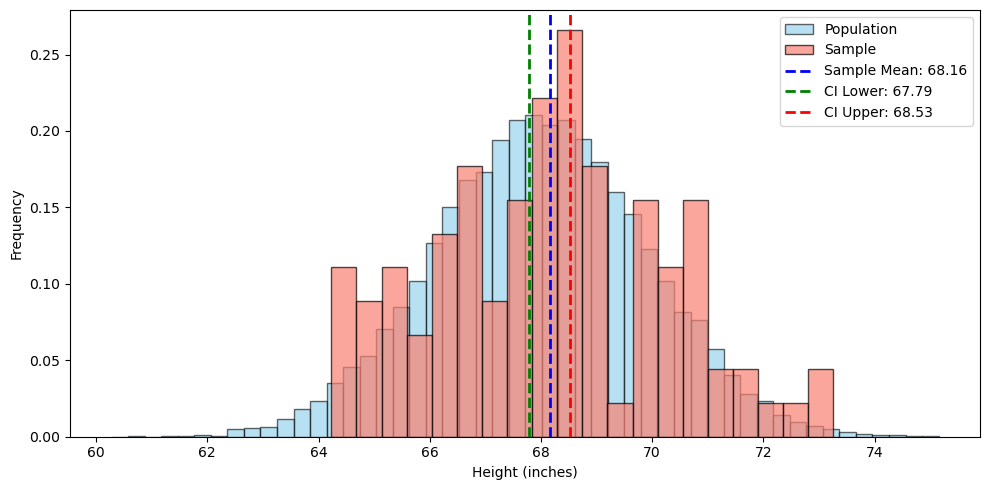

In [57]:
plt.figure(figsize=(10,5))
plt.hist(data['Height(Inches)'], bins=50, color='skyblue', alpha=0.6, edgecolor='black',label='Population', density=True)
plt.hist(sample['Height(Inches)'], bins=20, color='salmon', alpha=0.7, edgecolor='black',label='Sample', density=True)
plt.axvline(sample_mean_height, color='blue', linestyle='--', linewidth=2, label=f'Sample Mean: {sample_mean_height:.2f}')
plt.axvline(ci_lower, color='green', linestyle='--', linewidth=2, label=f'CI Lower: {ci_lower:.2f}')
plt.axvline(ci_upper, color='red', linestyle='--', linewidth=2, label=f'CI Upper: {ci_upper:.2f}')
plt.xlabel("Height (inches)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.legend()

In [58]:
def Z_test(sample_mean, sample_std, sample_size, confidenece_level):
    margin = confidenece_level * (sample_std / np.sqrt(sample_size))
    upper_limit = sample_mean + margin
    lower_limit = sample_mean - margin
    return upper_limit, lower_limit


ci_upper, ci_lower = Z_test(sample['Height(Inches)'].mean(), sample_std_height, len(sample), 1.96)

## 📊 Z-Test: 95% Confidence Interval

Below is the comparison between **population** and **sample distribution**, along with the **95% Confidence Interval (CI)** for the sample mean.

---

### 📈 Visualization

<img src="../output.png" alt="Z-Test CI Plot" width="700"/>

---

### 🧮 Key Statistics

| Statistic | Symbol | Value |
|------------|:--------:|-------:|
| Population Mean | μ | 70.00 |
| Population Std Dev | σ | 14.98 |
| Sample Size | n | 100 |
| Sample Mean | 𝑥̄ | 68.97 |
| Standard Error | SE | 1.50 |
| Z Critical Value (95%) | Z<sub>α/2</sub> | 1.96 |
| CI Lower Bound | — | 66.04 |
| CI Upper Bound | — | 71.91 |

---

### 🧠 Interpretation

> We are **95% confident** that the **true population mean weight** lies between  
> **66.04 kg** and **71.91 kg**.  
>  
> Since the known population mean (70 kg) lies **within this interval**,  
> our **sample is consistent** with the population distribution.

---

### ⚡ Formula Used

$$
CI = \bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$
